In [ ]:
#https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset/data
#https://www.kaggle.com/code/harunshimanto/sign-language-digits-dataset-with-pca

In [1]:
!pip install opendatasets

In [51]:
import numpy as np
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import decomposition
from sklearn.linear_model import RidgeCV,LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import time
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
od.download(
    "https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sowmyajayakanth
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset


100%|██████████| 16.8M/16.8M [00:00<00:00, 54.8MB/s]


In [4]:
os.listdir('.')

['.config', 'sign-language-digits-dataset', 'sample_data']

In [5]:
os.listdir('./sign-language-digits-dataset')

['Sign-language-digits-dataset', 'Y.npy', 'X.npy']

In [6]:
X = np.load('./sign-language-digits-dataset/X.npy')
Y = np.load('./sign-language-digits-dataset/Y.npy')

In [7]:
# Shape
print(X.shape) #2062 samples 64*64 pixels
print(Y.shape) #2062 rows 10 classes

(2062, 64, 64)
(2062, 10)


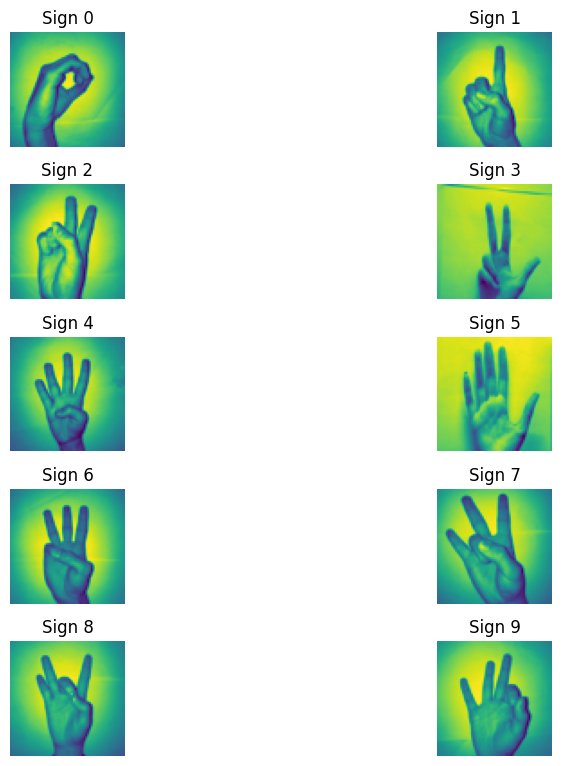

In [16]:
img_size = 64
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    ax.imshow(X[[260,900,1800,1600,1400,2061,700,500,1111,100]][i].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(i)
    plt.title(title)
plt.show()



In [19]:
# Scaling
x_scaled = X / 255
df = pd.DataFrame(x_scaled.reshape(len(X),64*64))
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.001830,0.001861,0.001876,0.001892,0.001907,0.001922,0.001938,0.001938,0.001984,0.002015,...,0.002307,0.002353,0.002307,0.002261,0.002199,0.002168,0.002138,0.002076,0.002045,0.001999
1,0.002338,0.002384,0.002430,0.002476,0.002522,0.002537,0.002584,0.002614,0.002676,0.002722,...,0.001830,0.001784,0.001738,0.001692,0.001646,0.001630,0.001553,0.001522,0.001492,0.001461
2,0.002307,0.002368,0.002430,0.002476,0.002522,0.002568,0.002614,0.002676,0.002753,0.002784,...,0.001184,0.001692,0.001738,0.001722,0.001692,0.001661,0.001615,0.001584,0.001569,0.001522
3,0.002184,0.002230,0.002291,0.002353,0.002399,0.002430,0.002461,0.002507,0.002568,0.002599,...,0.001722,0.001692,0.001646,0.001615,0.001584,0.001553,0.001507,0.001476,0.001461,0.001446
4,0.002276,0.002261,0.002322,0.002384,0.002414,0.002491,0.002522,0.002537,0.002584,0.002630,...,0.002030,0.001984,0.001953,0.001922,0.001861,0.001830,0.001799,0.001769,0.001738,0.001707


In [21]:
df_y = pd.DataFrame(Y)
df_y.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x_covar = np.cov(df.T)
x_covar

array([[1.82136638e-07, 1.79117815e-07, 1.75866313e-07, ...,
        1.09438021e-07, 1.11150256e-07, 1.13095565e-07],
       [1.79117815e-07, 1.77701265e-07, 1.74950033e-07, ...,
        1.06455617e-07, 1.08113219e-07, 1.09974616e-07],
       [1.75866313e-07, 1.74950033e-07, 1.73443054e-07, ...,
        1.03669110e-07, 1.05294388e-07, 1.07092300e-07],
       ...,
       [1.09438021e-07, 1.06455617e-07, 1.03669110e-07, ...,
        1.48459886e-07, 1.48736028e-07, 1.49688352e-07],
       [1.11150256e-07, 1.08113219e-07, 1.05294388e-07, ...,
        1.48736028e-07, 1.49990142e-07, 1.51216038e-07],
       [1.13095565e-07, 1.09974616e-07, 1.07092300e-07, ...,
        1.49688352e-07, 1.51216038e-07, 1.53061757e-07]])

In [160]:
x_eig_val,x_eig_vec = np.linalg.eig(x_covar)

In [24]:
tot = sum(x_eig_val)
var_exp = [(i/tot) * 100 for i in sorted(x_eig_val,reverse=True)]
var_exp

[(12.000263943839203+0j),
 (7.080331246308166+0j),
 (4.303715858795704+0j),
 (4.136791472425877+0j),
 (3.7824935464763705+0j),
 (3.369364439629014+0j),
 (2.7494493406602856+0j),
 (2.1498483639110324+0j),
 (2.0116281380908587+0j),
 (1.8765532852780944+0j),
 (1.7797200997143614+0j),
 (1.75173732115653+0j),
 (1.561228725264813+0j),
 (1.4241048300818762+0j),
 (1.3911194210647515+0j),
 (1.3235426241526163+0j),
 (1.2566888467826771+0j),
 (1.1874027200404984+0j),
 (1.1348859541112069+0j),
 (1.0311155375375145+0j),
 (0.9439274114478603+0j),
 (0.9180163114172925+0j),
 (0.8790828005374356+0j),
 (0.8409796436875696+0j),
 (0.7777300600749334+0j),
 (0.717116599909778+0j),
 (0.6864974378464188+0j),
 (0.6579556858435931+0j),
 (0.6244811051518157+0j),
 (0.5876175613606397+0j),
 (0.5659175367827411+0j),
 (0.5468512836401668+0j),
 (0.5268477737944438+0j),
 (0.5135626905498898+0j),
 (0.49494279290028254+0j),
 (0.4635224082827574+0j),
 (0.4622146338336391+0j),
 (0.4381990048068166+0j),
 (0.435642165969338

In [25]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.00026394+0.j,  19.08059519+0.j,  23.38431105+0.j, ...,
       100.        +0.j, 100.        +0.j, 100.        +0.j])

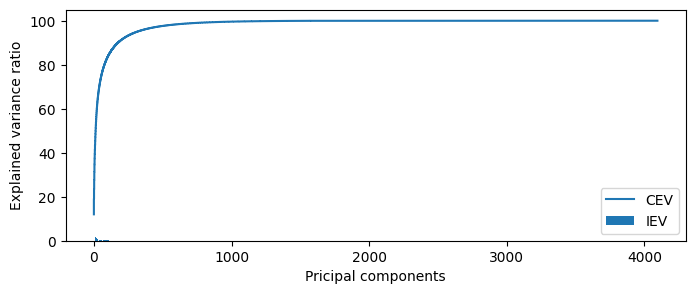

In [26]:
plt.figure(figsize=(8,3))
plt.step(range(len(cum_var_exp)),cum_var_exp,label='CEV')
plt.bar(range(len(var_exp)),var_exp,label='IEV')
plt.ylabel('Explained variance ratio')
plt.xlabel('Pricipal components')
plt.legend()
plt.show()

In [27]:
df_y['target'] = np.nan
for i in range(0,10):
  df_y.loc[df_y[i] == 1.0,['target']] =   i

In [28]:
df_y['target'].value_counts()

target
5.0    208
3.0    207
6.0    207
9.0    207
2.0    206
4.0    206
7.0    206
8.0    206
1.0    205
0.0    204
Name: count, dtype: int64

In [29]:
df_y

,0,1,2,3,4,5,6,7,8,9,target
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


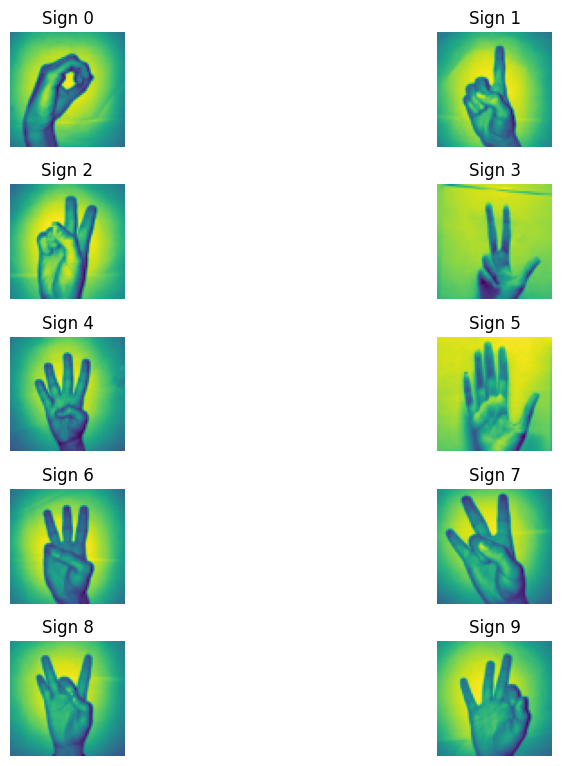

In [30]:
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
img_size = 64
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    plt.imshow(x_scaled[[260,900,1800,1600,1400,2061,700,500,1111,100]][i].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(i)
    plt.title(title)
plt.show()

In [31]:
X_col = df
Y_col = df_y['target']

In [32]:
X_train, X_test, y_train,y_test = train_test_split (X_col,Y_col,test_size = 0.2 ,random_state = 42)

In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1649, 4096), (1649,), (413, 4096), (413,))

In [34]:
model_pca = PCA()
model_pca.fit(X_train)
pca_cumsum = np.cumsum(model_pca.explained_variance_ratio_)
d = np.argmax(pca_cumsum >= 0.95) + 1

In [35]:
print(f"Number of components needed to explain 95% variance: {d}")

Number of components needed to explain 95% variance: 301


In [139]:
model_pca_reduced = PCA(n_components=d)
x_reduced = model_pca_reduced.fit_transform(X_train)
X_recovered = model_pca_reduced.inverse_transform(x_reduced)
x_test_reduced = model_pca_reduced.transform(X_test)
X_test_recovered = model_pca_reduced.inverse_transform(x_test_reduced)

In [37]:
x_reduced.shape,y_train.shape,X_test.shape,y_test.shape

((1649, 301), (1649,), (413, 4096), (413,))

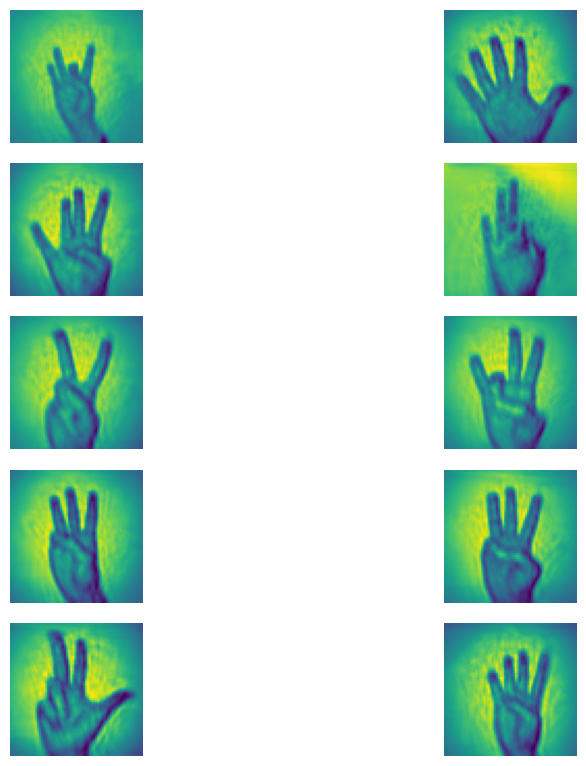

In [123]:
fig,ax=plt.subplots(nrows =5,ncols=2,figsize = (10,8))
j = 0
k = 0
for i in range(10):
    if i == 0:
        j = 0
        k = 0
    elif i%2 == 0:
        j = j + 1
        k = 0
    else:
        k = k + 1
    ax = plt.subplot2grid((5,2),(j,k))
    fig.tight_layout()
    plt.imshow(X_recovered[i].reshape(64,64))
    plt.axis('off')
plt.show()

In [40]:
model_svc = SVC()
model_svc.fit(x_reduced,y_train)

SVC()

In [41]:
y_pred = model_svc.predict(x_test_reduced)

In [42]:
accuracy_score(y_test,y_pred)

0.8595641646489104

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        40
         1.0       0.92      0.92      0.92        48
         2.0       0.75      0.84      0.79        50
         3.0       0.69      0.83      0.75        35
         4.0       0.90      0.84      0.87        32
         5.0       0.87      0.87      0.87        38
         6.0       0.80      0.68      0.74        41
         7.0       1.00      0.92      0.96        38
         8.0       0.85      0.78      0.81        45
         9.0       0.91      0.93      0.92        46

    accuracy                           0.86       413
   macro avg       0.86      0.86      0.86       413
weighted avg       0.86      0.86      0.86       413



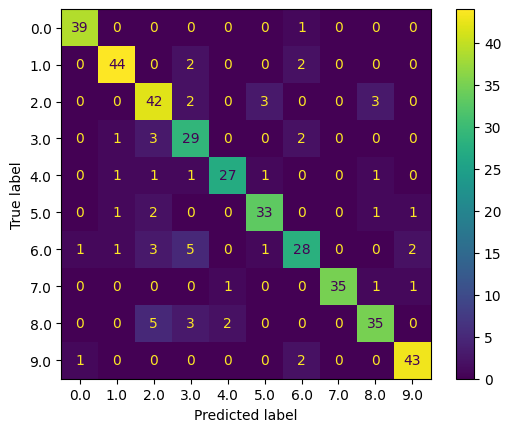

In [53]:
c_mat = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(c_mat,display_labels=model_svc.classes_)
display.plot()

In [ ]:
y_pred

array([3., 9., 3., 9., 0., 0., 8., 2., 5., 9., 4., 9., 7., 1., 2., 3., 0.,
       5., 0., 7., 0., 2., 3., 1., 9., 2., 7., 3., 5., 9., 8., 5., 4., 6.,
       4., 6., 3., 1., 9., 2., 7., 7., 1., 1., 1., 2., 0., 7., 8., 9., 1.,
       9., 2., 2., 1., 0., 6., 8., 8., 8., 2., 7., 2., 7., 5., 9., 2., 2.,
       9., 4., 1., 1., 5., 7., 4., 9., 9., 5., 3., 8., 2., 9., 2., 0., 0.,
       0., 0., 4., 1., 2., 5., 8., 7., 4., 7., 4., 2., 2., 8., 9., 2., 0.,
       9., 0., 2., 1., 8., 8., 8., 7., 5., 8., 3., 3., 2., 3., 6., 1., 2.,
       5., 5., 0., 1., 5., 8., 2., 6., 5., 1., 0., 3., 1., 9., 9., 8., 3.,
       8., 9., 5., 8., 2., 2., 2., 6., 6., 1., 6., 2., 5., 4., 9., 2., 1.,
       2., 6., 2., 6., 6., 1., 1., 4., 5., 9., 8., 3., 2., 4., 7., 6., 9.,
       3., 7., 2., 9., 1., 3., 7., 6., 0., 2., 1., 7., 4., 2., 1., 6., 3.,
       2., 4., 8., 8., 6., 8., 3., 2., 0., 8., 3., 8., 1., 2., 7., 0., 2.,
       2., 4., 2., 5., 8., 8., 9., 0., 2., 8., 5., 3., 1., 3., 5., 0., 6.,
       4., 6., 1., 7., 5.

In [127]:
np.array(y_test)

array([6., 9., 3., 9., 0., 5., 8., 2., 5., 9., 4., 9., 7., 1., 3., 3., 0.,
       5., 0., 7., 0., 8., 3., 6., 9., 2., 7., 3., 5., 9., 8., 5., 4., 6.,
       4., 6., 3., 1., 9., 2., 7., 7., 3., 1., 1., 2., 0., 7., 8., 9., 1.,
       9., 6., 2., 1., 0., 6., 8., 2., 8., 8., 7., 2., 7., 5., 9., 2., 3.,
       6., 4., 1., 1., 5., 7., 4., 9., 9., 4., 3., 8., 8., 9., 2., 0., 9.,
       0., 0., 4., 1., 5., 5., 4., 7., 4., 7., 4., 2., 2., 8., 7., 2., 0.,
       9., 0., 2., 1., 7., 8., 8., 7., 2., 8., 3., 3., 2., 2., 6., 1., 5.,
       5., 5., 0., 1., 5., 8., 2., 6., 5., 1., 0., 3., 1., 9., 9., 8., 3.,
       8., 9., 2., 2., 2., 6., 2., 6., 6., 1., 6., 2., 5., 4., 9., 2., 1.,
       2., 6., 2., 6., 6., 1., 1., 7., 5., 9., 8., 6., 2., 4., 7., 6., 9.,
       8., 7., 2., 9., 1., 6., 7., 6., 0., 6., 1., 7., 4., 8., 4., 3., 2.,
       2., 4., 2., 8., 6., 8., 3., 2., 0., 8., 8., 8., 5., 4., 7., 0., 8.,
       2., 4., 2., 5., 5., 8., 9., 0., 2., 8., 5., 3., 1., 3., 5., 0., 6.,
       4., 6., 1., 7., 5.

In [54]:
def get_misclassifed_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification

In [56]:
get_misclassification=get_misclassifed_index(y_pred,y_test)

In [121]:
len(get_misclassification)

58

In [134]:
len(X_test_recovered)

413

In [167]:
def plot_misclassification(misclassification):
    plt.figure(figsize=(20,4))
    for index,wrong in enumerate(misclassification[0:5]):
        #print(1)
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(X_test_recovered[wrong],(64,64)),cmap=plt.cm.gray)
        plt.title('predicted: {} Actual: {}'.format(y_pred[wrong],np.array(y_test) [wrong]))

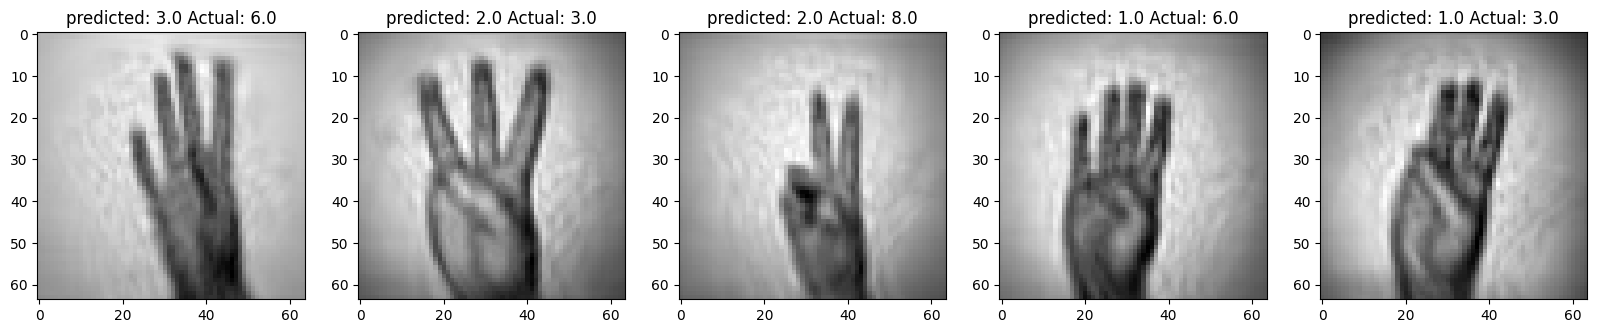

In [168]:
plot_misclassification(get_misclassification)

In [169]:
def classifed_index(y_pred,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
        if predicted==actual:
            misclassification.append(index)
    return misclassification

In [170]:
get_misclassification = classifed_index(y_pred,y_test)

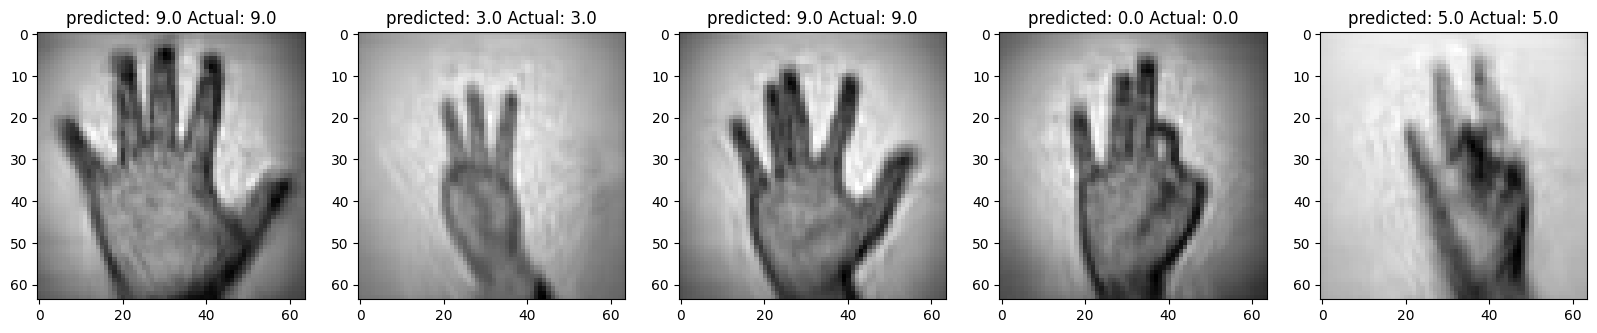

In [171]:
plot_misclassification(get_misclassification)